In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('spam.csv', encoding = "ISO-8859-1")

df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
272,spam,HMV BONUS SPECIAL 500 pounds of genuine HMV vo...,NaN,NaN,NaN
4275,ham,Can you please send me my aunty's number,NaN,NaN,NaN
3568,ham,She's fine. Sends her greetings,NaN,NaN,NaN
3238,ham,Am okay. Will soon be over. All the best,NaN,NaN,NaN
3243,ham,Squeeeeeze!! This is christmas hug.. If u lik ...,NaN,NaN,NaN


In [3]:
df.shape

(5572, 5)

In [4]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(5)

,v1,v2
5478,ham,No probably &lt;#&gt; %.
1581,ham,Hhahhaahahah rofl wtf nig was leonardo in your...
4039,ham,I'm at home n ready...
3702,ham,How is my boy? No sweet words left for me this...
455,ham,Si si. I think ill go make those oreo truffles.


In [5]:
df.rename(columns={'v1':'target','v2': 'text'},inplace=True)
df.sample(5)

,target,text
4652,ham,Lol yes. But it will add some spice to your day.
3508,ham,Hi Petey!noiåÕm ok just wanted 2 chat coz aven...
4560,ham,Good afternoon my boytoy. How goes that walkin...
309,ham,Where are the garage keys? They aren't on the ...
1488,ham,Tell them no need to investigate about me anyw...


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['target'] = le.fit_transform(df['target'])
df.isnull().sum()
df.drop_duplicates(keep='first')

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


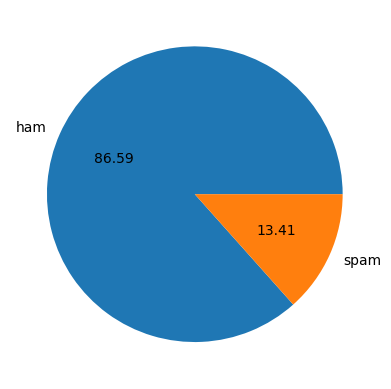

In [7]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [13]:
import nltk

In [9]:
df['num_characters'] = df['text'].apply(len)
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


C:\Users\dhruv\AppData\Local\Temp\ipykernel_7148\1950383679.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

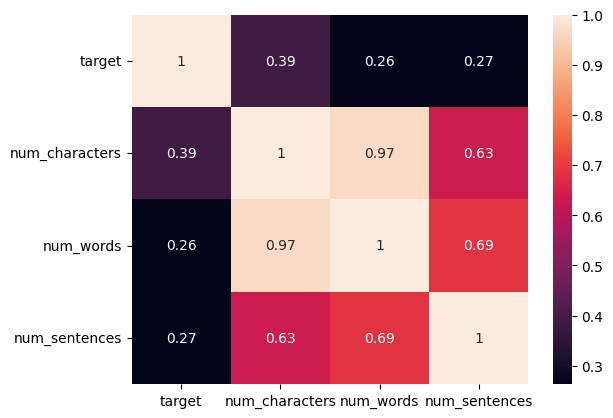

In [10]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)

In [12]:
import string

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [14]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


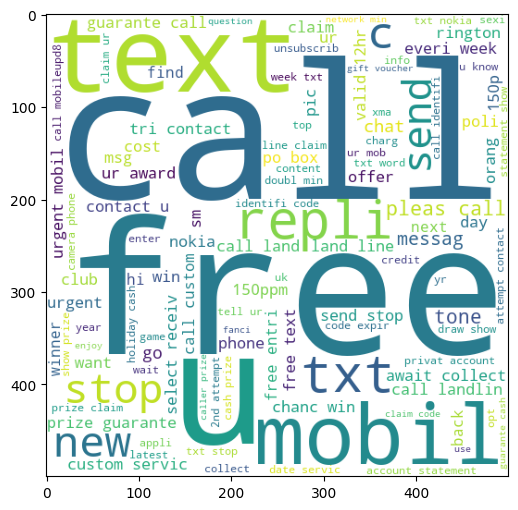

In [15]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

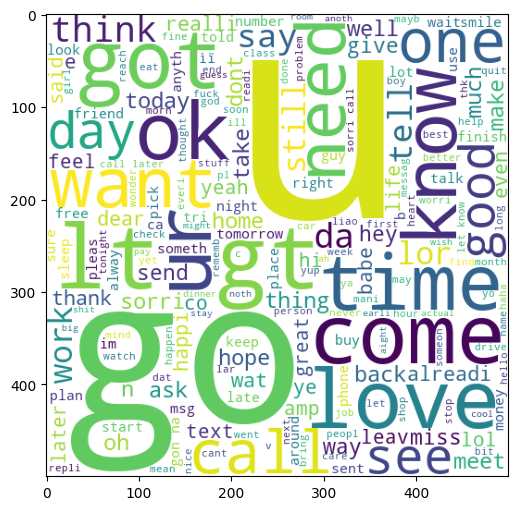

In [16]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(5572, 3000)

In [18]:
y = df['target'].values
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

mnb = MultinomialNB()
bnb = BernoulliNB()

In [19]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(recall_score(y_test,y_pred2))

0.9760765550239234
[[1443    3]
 [  37  189]]
0.984375
0.8362831858407079


In [20]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(recall_score(y_test,y_pred3))

0.9784688995215312
[[1439    7]
 [  29  197]]
0.9656862745098039
0.8716814159292036


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'ETC': etc,
}
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    recall = recall_score(y_test,y_pred)
    
    return accuracy,precision,recall

train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9748803827751196, 0.9509803921568627, 0.8584070796460177)

In [22]:
accuracy_scores = []
precision_scores = []
recall_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,current_recall = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Recall - ",current_recall)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    recall_scores.append(current_recall)
    
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores,'Recall':recall_scores}).sort_values('Precision',ascending=False)
performance_df

For  SVC
Accuracy -  0.9748803827751196
Precision -  0.9509803921568627
Recall -  0.8584070796460177
For  KN
Accuracy -  0.9186602870813397
Precision -  1.0
Recall -  0.39823008849557523
For  NB
Accuracy -  0.9760765550239234
Precision -  0.984375
Recall -  0.8362831858407079
For  DT
Accuracy -  0.9467703349282297
Precision -  0.9101796407185628
Recall -  0.672566371681416
For  LR
Accuracy -  0.9545454545454546
Precision -  0.9261363636363636
Recall -  0.7212389380530974
For  RF
Accuracy -  0.9760765550239234
Precision -  0.9894736842105263
Recall -  0.831858407079646
For  ETC
Accuracy -  0.9784688995215312
Precision -  0.9797979797979798
Recall -  0.8584070796460177


,Algorithm,Accuracy,Precision,Recall
1,KN,0.918660,1.000000,0.398230
5,RF,0.976077,0.989474,0.831858
2,NB,0.976077,0.984375,0.836283
6,ETC,0.978469,0.979798,0.858407
0,SVC,0.974880,0.950980,0.858407
4,LR,0.954545,0.926136,0.721239
3,DT,0.946770,0.910180,0.672566


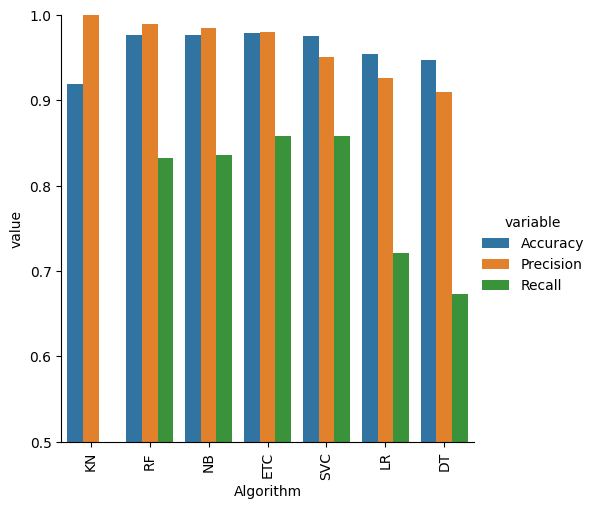

In [23]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [24]:
import pickle
pickle.dump(tfidf,open('tockenizer.pkl','wb'))
pickle.dump(mnb,open('model_weigths.h5','wb'))

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score

roc_auc_scores = []
for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    roc_auc_scores.append(roc_auc)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

f1_scores = []
for name, clf in clfs.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    f1 = f1_score(y_test, y_pred)
    f1_scores.append(f1)
    print(f"F1 Score for {name}: {f1:.4f}")



AttributeError: predict_proba is not available when probability=False